# Prepare Data

In [47]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/heart_2020_cleaned.csv"

Mounted at /content/drive


# Import Library

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import f1_score

# EDA

In [49]:
df=pd.read_csv(path)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


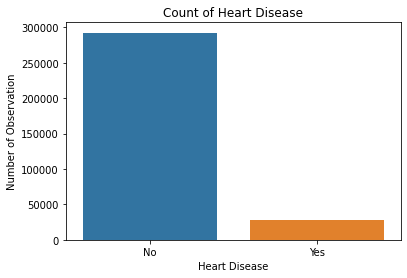

In [50]:
sns.countplot('HeartDisease',data=df)
plt.title('Count of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Observation')
plt.show()

In [51]:
df["HeartDisease"].value_counts() 

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [52]:
cor_mat= df.corr()

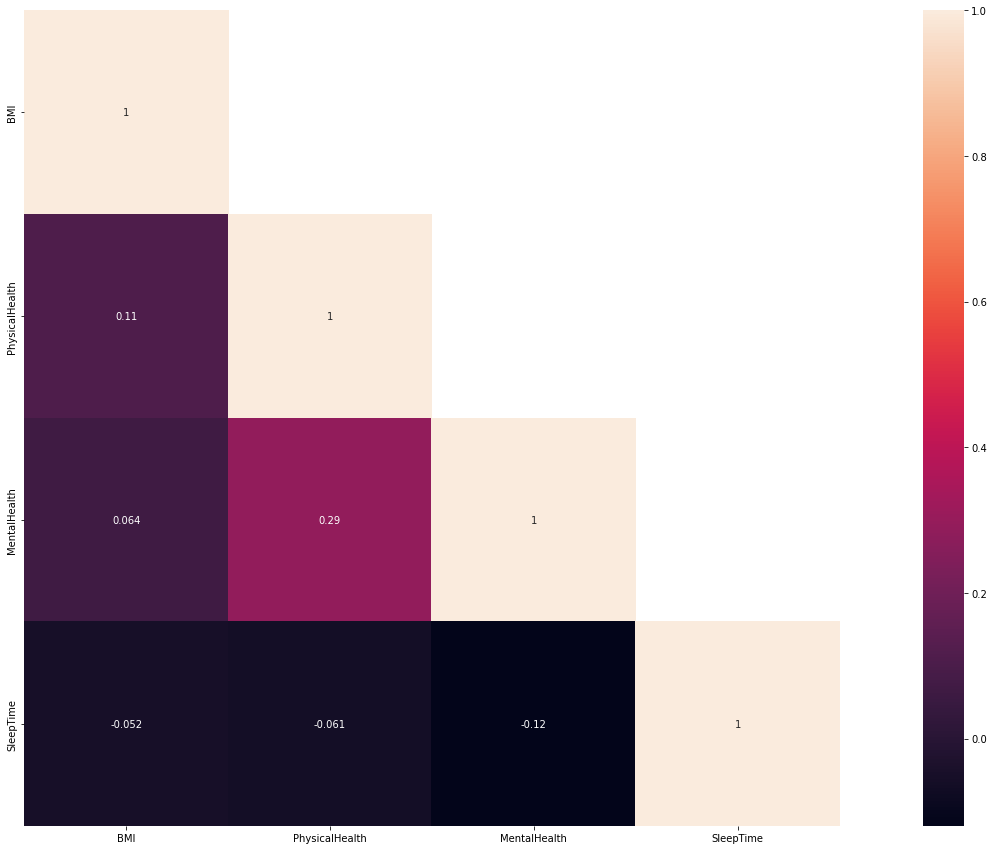

In [53]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30, 15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# Null Data

In [54]:
null_data=df.isna().sum()
null_data

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Unique Data

In [55]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# Describe Data

In [56]:
vectorizer=CountVectorizer(lowercase=False)
vectorizer.fit_transform(df)
feat_dict=vectorizer.vocabulary_.keys()
feat_dict

dict_keys(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'])

In [57]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Label Encoder

In [58]:
df.shape

(319795, 18)

In [59]:
le = LabelEncoder()
df['HeartDiseaseLE'] = le.fit_transform(df['HeartDisease'])
yLE = df['HeartDiseaseLE'].values[:,np.newaxis]
yLE.shape

(319795, 1)

In [60]:
yLE

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# One Hot Encoding

In [61]:
X = df.drop(["HeartDisease"],axis=1)
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDiseaseLE
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1
319791,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0
319792,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0
319793,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0


In [62]:
X.shape

(319795, 18)

In [63]:
s = (X.dtypes == 'object')
object_cols_X = list(s[s].index)

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X]))

In [64]:
OH_cols.shape

(319795, 46)

In [65]:
object_cols_X

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [67]:
X_number = X.drop(object_cols_X, axis=1)

In [68]:
X_number.shape

(319795, 5)

In [69]:
X_number

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseLE
0,16.60,3.0,30.0,5.0,0
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,0
3,24.21,0.0,0.0,6.0,0
4,23.71,28.0,0.0,8.0,0
...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1
319791,29.84,0.0,0.0,5.0,0
319792,24.24,0.0,0.0,6.0,0
319793,32.81,0.0,0.0,12.0,0


In [70]:
OH_cols.shape

(319795, 46)

In [71]:
OH_cols

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [72]:
X_number.reset_index(drop=True, inplace=True)
OH_cols.reset_index(drop=True, inplace=True)

OHE_X = pd.concat([X_number, OH_cols], axis=1)
OHE_X.shape

(319795, 51)

In [73]:
OHE_X

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseLE,0,1,2,3,4,...,36,37,38,39,40,41,42,43,44,45
0,16.60,3.0,30.0,5.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,0.0,7.0,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,26.58,20.0,30.0,8.0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,24.21,0.0,0.0,6.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.71,28.0,0.0,8.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,29.84,0.0,0.0,5.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,24.24,0.0,0.0,6.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,32.81,0.0,0.0,12.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Splitting Data

In [74]:
X = OHE_X
y = df["HeartDiseaseLE"].values[:,np.newaxis]

In [75]:
X

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseLE,0,1,2,3,4,...,36,37,38,39,40,41,42,43,44,45
0,16.60,3.0,30.0,5.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20.34,0.0,0.0,7.0,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,26.58,20.0,30.0,8.0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,24.21,0.0,0.0,6.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.71,28.0,0.0,8.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,29.84,0.0,0.0,5.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,24.24,0.0,0.0,6.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,32.81,0.0,0.0,12.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [76]:
y.shape

(319795, 1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Hyperparameter Tuning

In [78]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 4))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

In [79]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 684 candidates, totalling 2052 fits
Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Model 1

In [80]:
clf_gini = DecisionTreeClassifier(**best_params)
clf_gini.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=1)

In [81]:
y_pred = clf_gini.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [82]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
f1=f1_score(y_test, y_pred)

In [83]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


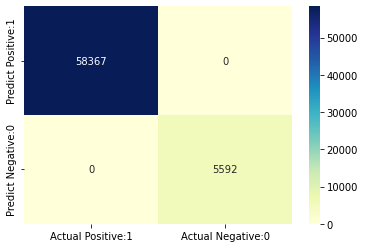

In [84]:
cm = pd.DataFrame(data=c,columns=['Actual Positive:1','Actual Negative:0'],
                           index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [85]:
print("accuracy",a)
print("precision",p)
print("recall",r)
print("f1 score",f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[Text(0.5, 0.75, 'X[4] <= 0.5\ngini = 0.156\nsamples = 255836\nvalue = [234055, 21781]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 234055\nvalue = [234055, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 21781\nvalue = [0, 21781]')]

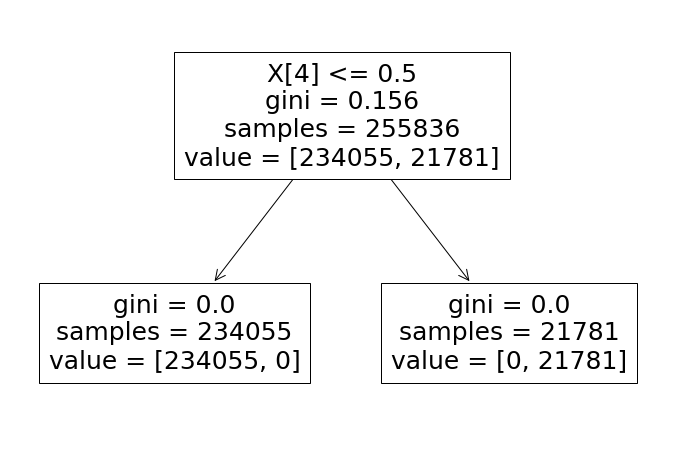

In [86]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

# Model 2

In [87]:
clf2_gini = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=42)
clf2_gini.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=1, random_state=42)

In [88]:
y_pred = clf2_gini.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [89]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
f1=f1_score(y_test, y_pred)

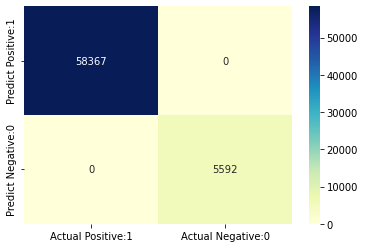

In [90]:
cm = pd.DataFrame(data=c,columns=['Actual Positive:1','Actual Negative:0'],
                           index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [91]:
print("accuracy",a)
print("precision",p)
print("recall",r)
print("f1 score",f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[Text(0.5, 0.75, 'X[4] <= 0.5\ngini = 0.156\nsamples = 255836\nvalue = [234055, 21781]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 234055\nvalue = [234055, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 21781\nvalue = [0, 21781]')]

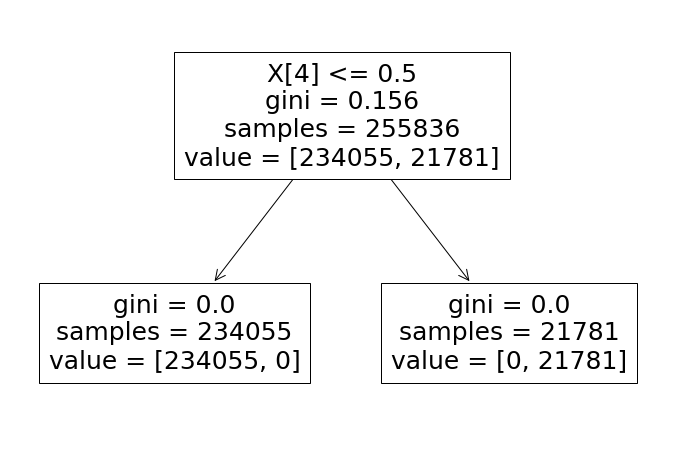

In [92]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf2_gini.fit(X_train, y_train))

# Information Gain

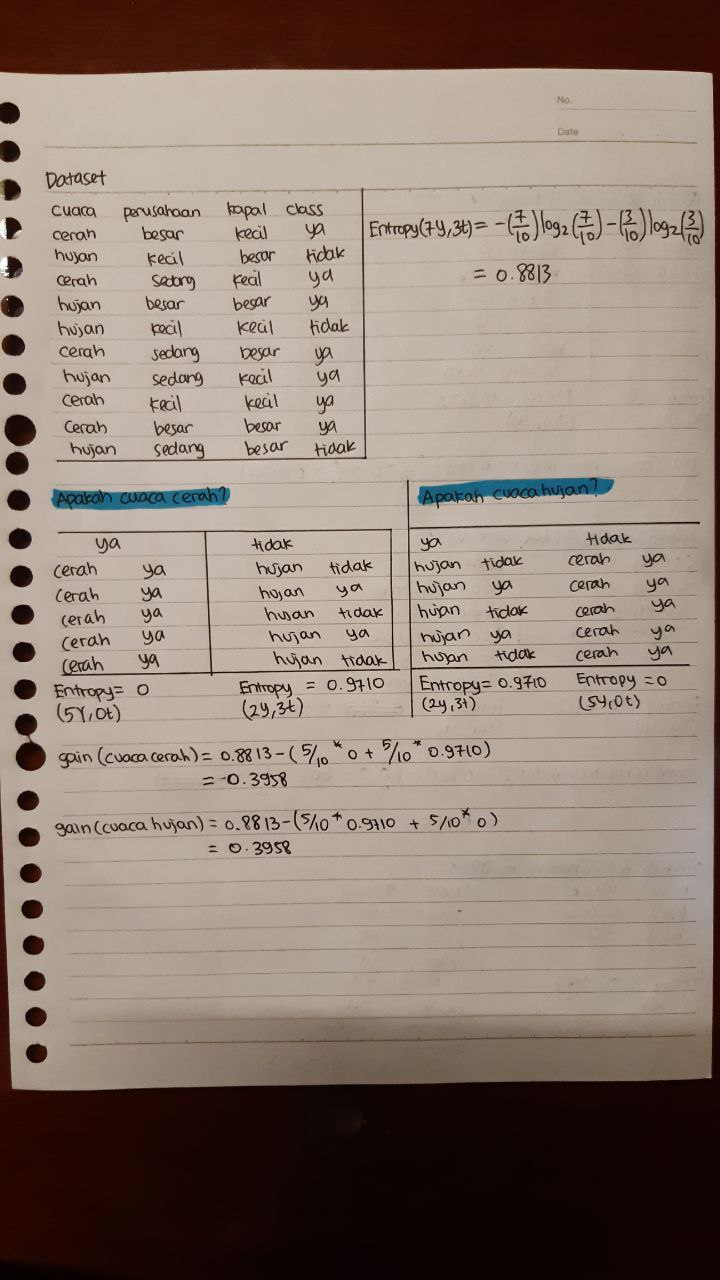

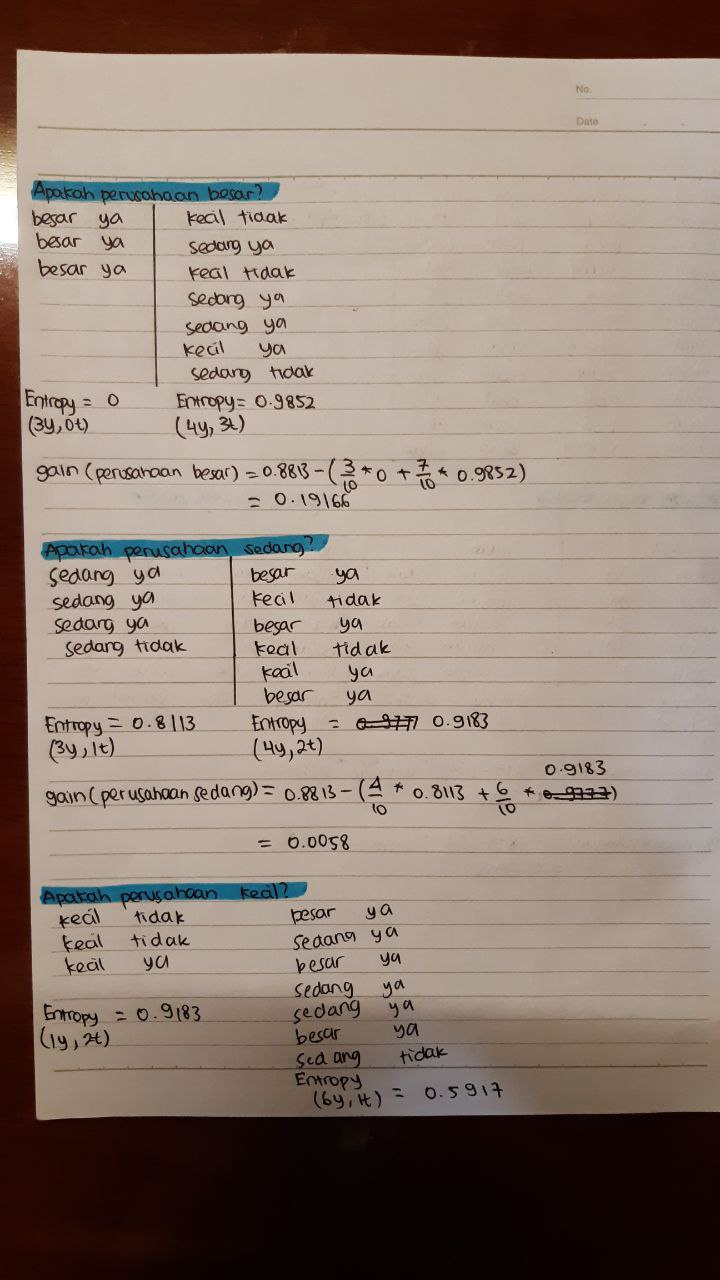

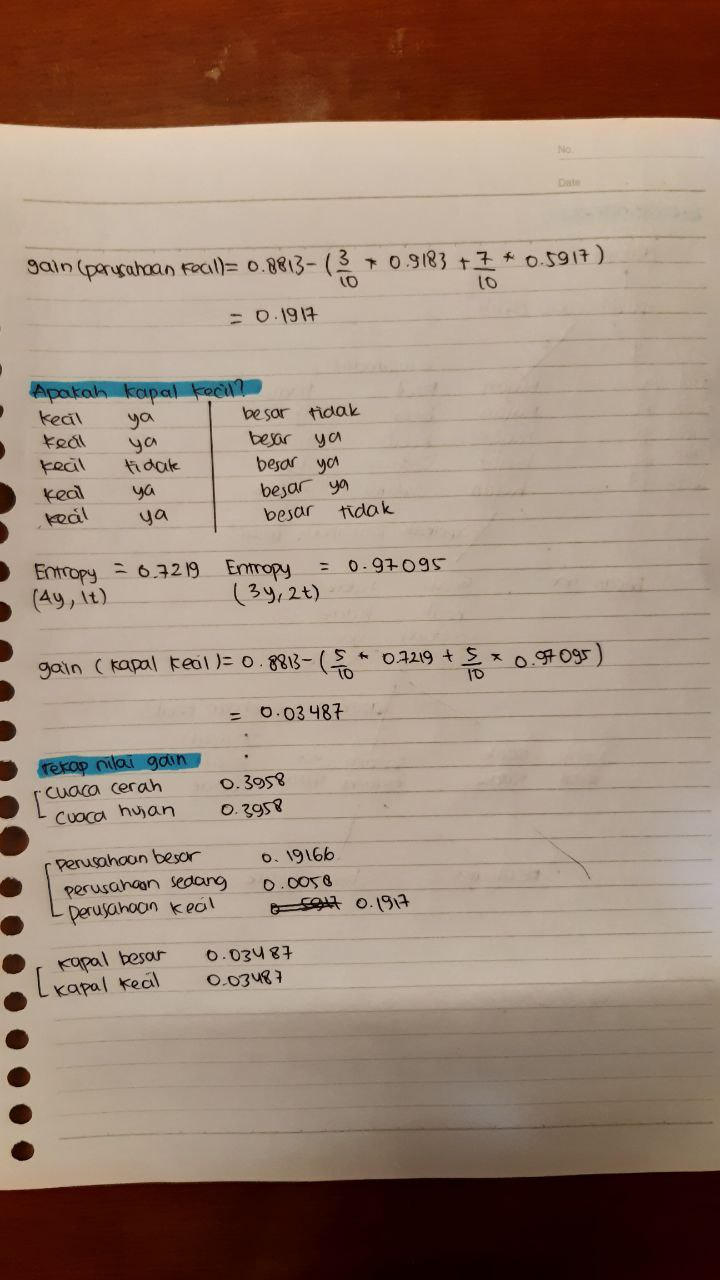

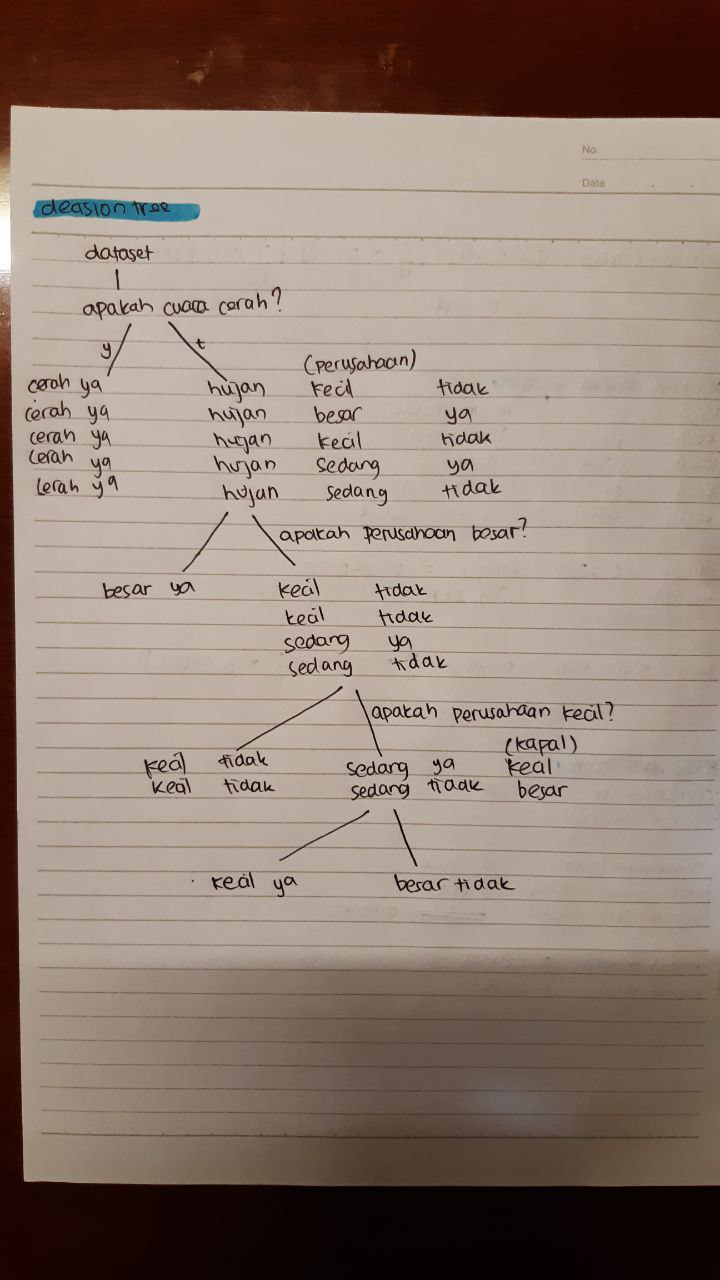